In [1]:
'''This Notebook generates Figure 3a-c for the MIST manuscript'''
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
data_names = ['Human_Breast_Cancer_BAS1', 'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE',
              'Human_Breast_Cancer_BAS2', 'Human_Breast_Cancer_Ductal_Carcinoma_FFPE','Human_Glioblastoma', 
              'Melanoma', 'MouseAD', 'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 
              'MouseWT', 'Human_Colorectal_Cancer','Human_Prostate_Cancer_Adenocarcinoma_FFPE','Prostate']

data_shorts = dict(zip(data_names, ['HBCB1', 'HPCACCF',
                                    'HBCB2', 'HBCDC', 'HG',
                                    'Melanoma', 'MouseAD', 'HIDC', 'HOC',
                                    'MouseWT', 'HCC', 'HPCA', 'Prostate']))

data_order = ['Human_Breast_Cancer_BAS1', 'Human_Breast_Cancer_BAS2',  'Human_Breast_Cancer_Ductal_Carcinoma_FFPE',             
              'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE', 'Human_Prostate_Cancer_Adenocarcinoma_FFPE',
              'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 'Human_Glioblastoma', 'Human_Colorectal_Cancer', 
              'Melanoma', 'MouseAD', 'MouseWT', 'Prostate']

data_order = [data_shorts[dn] for dn in data_order]

# run_in_houston = ['Human_Breast_Cancer_BAS1','Human_Breast_Cancer_BAS2','Human_Ovarian_Cancer', 'Melanoma', 'Prostate']


In [3]:
ls /home/humble_local2_25t/alexw/MIST_round3/MIST_additional_holdout/data/MouseWT/performance/

ls: cannot access '/home/humble_local2_25t/alexw/MIST_round3/MIST_additional_holdout/data/MouseWT/performance/': No such file or directory


In [6]:
slide_perfs = []
for dn in data_names:
#     if dn in run_in_houston:
#         dataDir = '../data'
#     else:
#         dataDir = '../data_other_servers'
    dataDir = "../..//MIST_additional_holdout/data/"
    fn = f"{dataDir}/{dn}/performance/slide_level_results.csv"
    df = pd.read_csv(fn, index_col=0)
    df["data"] = data_shorts[dn]
    df["data_full_name"] = dn
    slide_perfs.append(df)
slide_perfs = pd.concat(slide_perfs)
slide_perfs.reset_index(drop=True)

,RMSE,MAPE,SNR,PCC,ModelName,hoMR,impMR,redMR,cvFold,data,data_full_name
0,0.757145,0.094123,3.574295,0.852395,MIST,0.428054,0.000005,0.428049,0,HBCB1,Human_Breast_Cancer_BAS1
1,0.916379,0.106917,3.376313,0.786808,mcImpute,0.428054,0.001103,0.426950,0,HBCB1,Human_Breast_Cancer_BAS1
2,1.041531,0.118009,2.972926,0.793715,MAGIC,0.428054,0.000000,0.428054,0,HBCB1,Human_Breast_Cancer_BAS1
3,2.121043,0.205652,2.018562,0.535531,spKNN,0.428054,0.070377,0.357676,0,HBCB1,Human_Breast_Cancer_BAS1
4,2.433086,0.263055,2.098063,0.431147,knnSmooth,0.428054,0.072110,0.355944,0,HBCB1,Human_Breast_Cancer_BAS1
...,...,...,...,...,...,...,...,...,...,...,...
385,1.114772,0.110079,3.297122,0.615606,mcImpute,0.436921,0.000760,0.436161,4,Prostate,Prostate
386,1.256692,0.111758,3.034711,0.597357,MAGIC,0.436921,0.000118,0.436804,4,Prostate,Prostate
387,1.692742,0.146984,2.600475,0.517704,spKNN,0.436921,0.013451,0.423470,4,Prostate,Prostate
388,2.860100,0.244664,2.138308,0.274545,knnSmooth,0.436921,0.052842,0.384079,4,Prostate,Prostate


In [8]:
slide_perfs.to_csv("source_data_holdout_w_deepimpute.csv")

In [18]:
from scipy.stats import ttest_rel

### MIST's performance as compared to others
## Printed values are: model to be compared, percenta
r1 = slide_perfs.loc[slide_perfs.ModelName=='MIST', 'PCC'].to_numpy()
rmse1 = slide_perfs.loc[slide_perfs.ModelName=='MIST', 'RMSE'].to_numpy()

for model in ['MAGIC', 'knnSmooth', 'mcImpute', 'spKNN', 'DeepImpute']:
#     for data in ['MouseWT', 'MouseAD', 'Melanoma'']
    r2 = slide_perfs.loc[slide_perfs.ModelName==model, 'PCC'].to_numpy()
    
    if len(r1) != len(r2):
        dds =   set(slide_perfs.loc[slide_perfs.ModelName=='MIST',"data"]) - set(slide_perfs.loc[slide_perfs.ModelName==model,"data"])
        print(dds)
        
    pr = ttest_rel(r1, r2)[1]
    rmse2 = slide_perfs.loc[slide_perfs.ModelName==model, 'RMSE'].to_numpy()
    prmse = ttest_rel(rmse1, rmse2)[1]
    r1_mean, r2_mean, rmse1_mean, rmse2_mean = np.mean(r1), np.mean(r2), np.mean(rmse1), np.mean(rmse2)
    print(f"MIST vs {model}, \n\t{(100 * (r1_mean-r2_mean)/r2_mean):.2f}% increased PCC (P={pr}),\
 \n\t{(100 * (rmse2_mean-rmse1_mean)/rmse2_mean):.2f}% decreased RMSE (P = {prmse}) ")

MIST vs MAGIC, 
	7.69% increased PCC (P=1.9410810833005293e-30), 
	25.74% decreased RMSE (P = 8.525151080121443e-55) 
MIST vs knnSmooth, 
	122.07% increased PCC (P=4.027152542661478e-74), 
	69.46% decreased RMSE (P = 7.371835520130999e-66) 
MIST vs mcImpute, 
	7.89% increased PCC (P=2.545213282438441e-30), 
	12.96% decreased RMSE (P = 8.24105728648302e-26) 
MIST vs spKNN, 
	54.95% increased PCC (P=1.052179127708066e-37), 
	61.45% decreased RMSE (P = 1.1255735472153382e-37) 
MIST vs DeepImpute, 
	13.86% increased PCC (P=3.2378272975223535e-12), 
	34.09% decreased RMSE (P = 4.767706189367592e-24) 


## SLIDE LEVEL PERFORMANCE

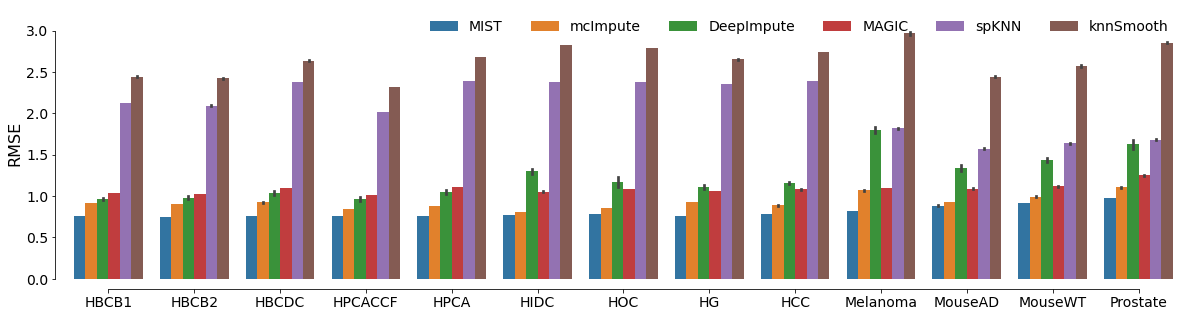

In [19]:
f1 = plt.figure(figsize=(20, 5))
sns.barplot(data=slide_perfs, x='data', y='RMSE', hue='ModelName', order=data_order, 
            hue_order = ['MIST', 'mcImpute', 'DeepImpute', 
                        'MAGIC', 'spKNN', 'knnSmooth'])
plt.xlabel("")
plt.legend(loc=1, ncol=len(set(slide_perfs.ModelName)), fontsize=14, frameon=False)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.tick_params(axis='both', labelsize=14)
plt.ylabel("RMSE", fontsize=16)
plt.savefig("holout_RMSE.png", dpi=200, bbox_inches='tight')

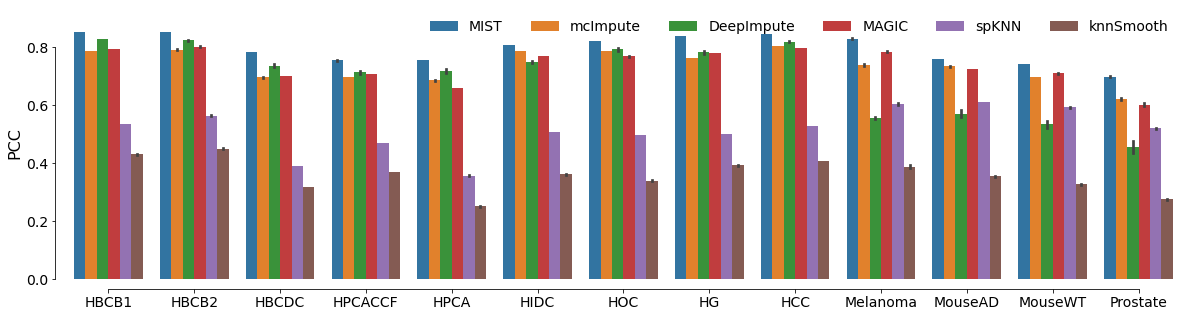

In [21]:
f2 = plt.figure(figsize=(20, 5))
sns.barplot(data=slide_perfs, x='data', y='PCC', hue='ModelName', order=data_order,
           hue_order = ['MIST', 'mcImpute', 'DeepImpute', 
                        'MAGIC', 'spKNN', 'knnSmooth'])
plt.xlabel("")
plt.legend(loc=1, ncol=len(set(slide_perfs.ModelName)), fontsize=14, frameon=False)
plt.margins(y=0.1)
plt.tick_params(axis='both', labelsize=14)
plt.ylabel("PCC", fontsize=16)
sns.despine(offset=10, trim=True);
plt.savefig("holout_PCC.png", dpi=200, bbox_inches='tight')

## GENE LEVEL Performance

In [34]:
gene_perfs = []
dataDir = "/home/humble_local2_25t/alexw/MIST_round3/MIST_additional_holdout/data/"
for dn in data_names:
    fn = f"{dataDir}/{dn}/performance/gene_level_results.csv"
    df = pd.read_csv(fn)
    df["data"] = data_shorts[dn]
    df["data_full_name"] = dn
    gene_perfs.append(df)
gene_perfs = pd.concat(gene_perfs)
gene_perfs['Sparsity (Zero %)'] = (gene_perfs['mr'].round(1) * 100).astype(int)

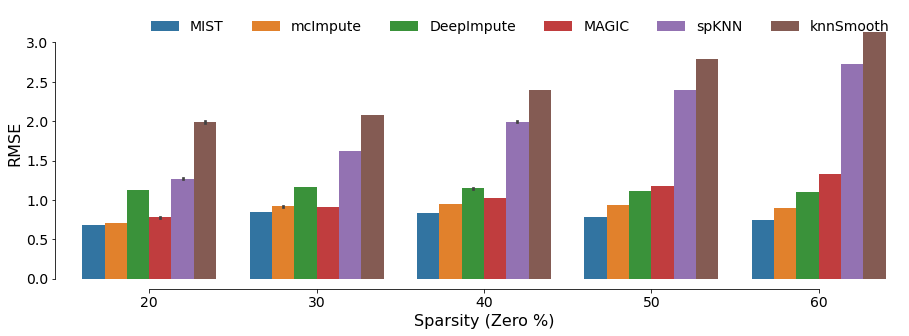

In [35]:
f3 = plt.figure(figsize=(15, 5))
sns.barplot(data=gene_perfs, x='Sparsity (Zero %)', y='rmse', hue='model',
           hue_order=['MIST', 'mcImpute', 'DeepImpute', 
                        'MAGIC', 'spKNN', 'knnSmooth'])
plt.legend(loc=1)
plt.tick_params(labelsize=14, axis='both')
plt.ylabel("RMSE", fontsize=16)
plt.xlabel('Sparsity (Zero %)', fontsize=16)
plt.legend(ncol=len(set(slide_perfs.ModelName)), loc=1, fontsize=14, frameon=False)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.savefig("holout_gene_sparsity_RMSE.png", dpi=200, bbox_inches='tight')

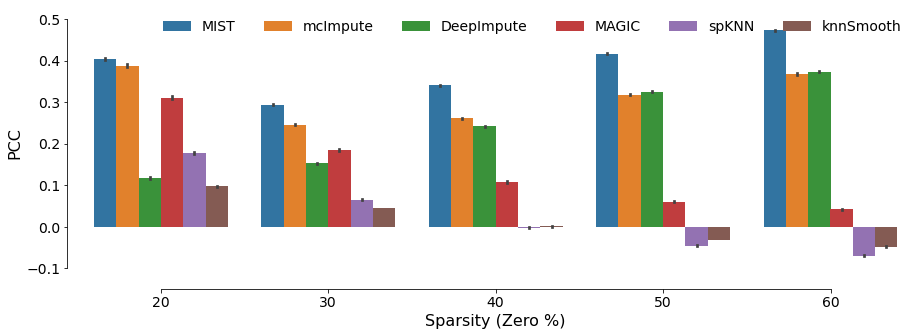

In [37]:
f3 = plt.figure(figsize=(15, 5))
sns.barplot(data=gene_perfs, x='Sparsity (Zero %)', y='pcc', hue='model',
           hue_order=['MIST', 'mcImpute', 'DeepImpute', 
                        'MAGIC', 'spKNN', 'knnSmooth'])
plt.legend(loc=1)
plt.tick_params(labelsize=14, axis='both')
plt.ylabel("PCC", fontsize=16)
plt.xlabel('Sparsity (Zero %)', fontsize=16)
plt.legend(ncol=len(set(slide_perfs.ModelName)), loc=1, fontsize=14, frameon=False)
plt.margins(y=0.1)
sns.despine(offset=10, trim=True);
plt.savefig("holout_gene_sparsity_pcc.png", dpi=200, bbox_inches='tight')

In [28]:
gene_perfs

,Unnamed: 0,gene,rmse,pcc,snr,mape,model,mr,cvFold,data,data_full_name,Sparsity (Zero %)
0,0,NOC2L,0.815215,-0.217742,3.263027,0.112377,MIST,0.493283,0,HBCB1,Human_Breast_Cancer_BAS1,50
1,1,HES4,0.788213,-0.011625,3.539482,0.094268,MIST,0.350081,0,HBCB1,Human_Breast_Cancer_BAS1,40
2,2,ISG15,0.493030,0.828490,4.803668,0.037019,MIST,0.201236,0,HBCB1,Human_Breast_Cancer_BAS1,20
3,3,AGRN,0.753656,-0.170351,3.382590,0.103426,MIST,0.544331,0,HBCB1,Human_Breast_Cancer_BAS1,50
4,4,TNFRSF18,0.706214,-0.170607,3.357922,0.103247,MIST,0.578452,0,HBCB1,Human_Breast_Cancer_BAS1,60
...,...,...,...,...,...,...,...,...,...,...,...,...
51535,1713,CUEDC2 ENSG00000107874,1.639475,0.116185,2.645928,0.180483,DeepImpute,0.586207,4,Prostate,Prostate,60
51536,1714,CTNND1 ENSG00000198561,1.476952,0.168423,2.713270,0.163586,DeepImpute,0.507389,4,Prostate,Prostate,50
51537,1715,RAN ENSG00000132341,1.554448,0.177066,2.760628,0.161486,DeepImpute,0.546798,4,Prostate,Prostate,50
51538,1716,HSP90AA1 ENSG00000080824,1.491726,0.236396,2.841534,0.154892,DeepImpute,0.536946,4,Prostate,Prostate,50


In [31]:
gene_perfs.loc[gene_perfs['Sparsity (Zero %)'] == 40].groupby(["data", "model"]).mean("pcc")

Unnamed: 0      rmse       pcc       snr      mape  \
data     model                                                             
HBCB1    DeepImpute  2423.979725  0.993203 -0.090513  3.181752  0.131477   
         MAGIC       2423.979725  1.019824  0.283283  2.902016  0.120557   
         MIST        2423.979725  0.806803 -0.129683  3.394983  0.103946   
         knnSmooth   2423.979725  2.386358  0.364053  2.065786  0.267068   
         mcImpute    2423.979725  0.968823 -0.106495  3.192972  0.117646   
...                          ...       ...       ...       ...       ...   
Prostate MAGIC        853.828508  1.121315  0.195048  3.040625  0.110365   
         MIST         853.828508  1.016090  0.051116  3.291224  0.109009   
         knnSmooth    853.828508  2.575968  0.291809  2.217531  0.237178   
         mcImpute     853.828508  1.164325  0.036524  3.146920  0.119400   
         spKNN        853.828508  1.557186  0.439433  2.620616  0.141932   

                           mr    cvFold  Sparsity (Zero %)  
data     model                                              
HBCB1    DeepImpute  0.402463  2.000705               40.0  
         MAGIC       0.402463  2.000705               40.0  
         MIST        0.402463  2.000705               40.0  
         knnSmooth   0.402463  2.000705               40.0  
         mcImpute    0.402463  2.000705               40.0  
...                       ...       ...                ...  
Prostate MAGIC       0.403672  1.995546               40.0  
         MIST        0.403672  1.995546               40.0  
         knnSmooth   0.403672  1.995546               40.0  
         mcImpute    0.403672  1.995546               40.0  
         spKNN       0.403672  1.995546               40.0  

[78 rows x 8 columns]